# PCD Assignment 01

Daffa M. Siddiq - 24/533358/PA/22569

Pengolahan Citra Digital (KOM) - Assignment 1

---

Before we start the code and talk about each sampling techniques, I will upload two images that will be used as reference.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving imgTwo.png to imgTwo.png
Saving imgOne.JPG to imgOne.JPG


# Down Sampling - Max, Average, Medium

## Short Explanation

Downsampling is when we want to reduce the number of pixels by taking a group of pixels (e.g. 2x2 matrix) and decide on a **single** value to represent the whole group in a smaller image.

Example :

```
Original 4x4 Grid:
[[100, 100, 50, 50],
 [100, 100, 50, 50],
 [200, 200, 10, 10],
 [200, 200, 10, 10]]
```

Now, downsampling it by a factor of 2 (breaking it into 2x2 matrix) will produce this.

```
Downsampled 2x2 Grid:
[[100, 50],
 [200, 10]]
```

Let us now start the python implementation and how it works.

## Implementation

Python code for the Max, Average, and Medium downsampling techniques.

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display multiple images
# This will make it easier to compare images
def show_multiple(images, titles, figsize=(20, 6)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    plt.show()

# Downsampling Function
# Downsampling -- Max
def max_pooling(img, kernel_size=2):
    h, w, c = img.shape
    h_new, w_new = h // kernel_size, w // kernel_size
    downsampled = np.zeros((h_new, w_new, c), dtype=np.uint8)
    for y in range(0, h, kernel_size):
        for x in range(0, w, kernel_size):
            patch = img[y:y+kernel_size, x:x+kernel_size]
            downsampled[y//kernel_size, x//kernel_size] = np.max(patch.reshape(-1, c), axis=0)
    return downsampled

# Downsampling -- Average
def average_pooling(img, kernel_size=2):
    h, w, c = img.shape
    h_new, w_new = h // kernel_size, w // kernel_size
    downsampled = np.zeros((h_new, w_new, c), dtype=np.uint8)
    for y in range(0, h, kernel_size):
        for x in range(0, w, kernel_size):
            patch = img[y:y+kernel_size, x:x+kernel_size]
            downsampled[y//kernel_size, x//kernel_size] = np.mean(patch.reshape(-1, c), axis=0)
    return downsampled

# Downsampling -- Median
def median_pooling(img, kernel_size=2):
    h, w, c = img.shape
    h_new, w_new = h // kernel_size, w // kernel_size
    downsampled = np.zeros((h_new, w_new, c), dtype=np.uint8)
    for y in range(0, h, kernel_size):
        for x in range(0, w, kernel_size):
            patch = img[y:y+kernel_size, x:x+kernel_size]
            downsampled[y//kernel_size, x//kernel_size] = np.median(patch.reshape(-1, c), axis=0)
    return downsampled


<br>

---

Code for displaying the original image along with its downsampled counterpart.

Processing file: imgTwo.png


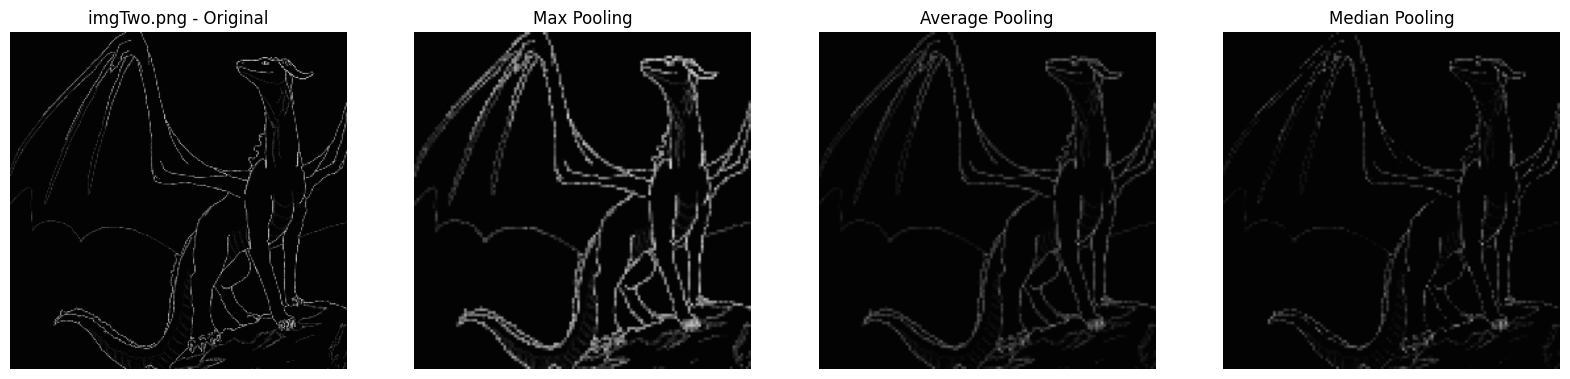

Processing file: imgOne.JPG


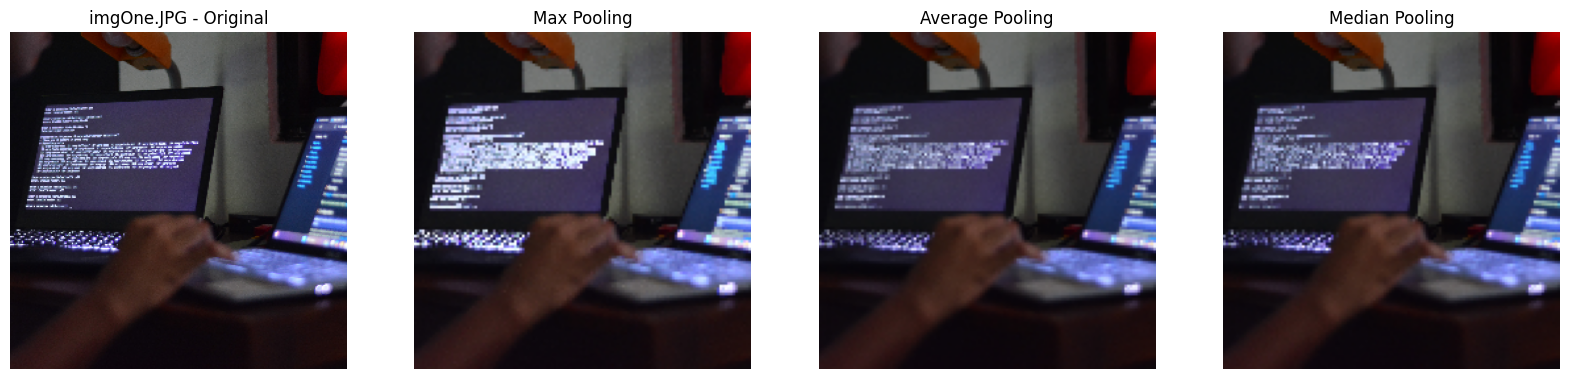

In [10]:
for filename in uploaded.keys():
    print(f"Processing file: {filename}")

    img = cv2.imread(filename)

    if img is None:
        print(f"Failed to read:{filename}")
        continue

    # Resize image to make it easier to downsample
    # Modify this value as much as you like. Do make sure that the numbers are the same though.
    img = cv2.resize(img, (256, 256))

    max_pooled = max_pooling(img)
    avg_pooled = average_pooling(img)
    med_pooled = median_pooling(img)

    show_multiple(
        [img, max_pooled, avg_pooled, med_pooled],
        [f'{filename} - Original', 'Max Pooling', 'Average Pooling', 'Median Pooling']
    )

# Up Sampling - NN, Bilinear, Bicubic

## Short Explanation

Upsampling is when we want to increase the number of pixels. This is when we have a small image and want to increase its resolution for the analysis that you need to do. This is when we need to **guess** what values to put in the new pixels to create -> this process is called **interpolation**.

Example :

```
Original 2x2 Grid:
[[100, 50],
 [200, 10]]
```

We want to upsample this into a bigger image. So this is our first thought on what it would be.

```
Upsampled 4x4 Grid:
[[ ?,  ?,  ?,  ?],
 [ ?, 100, 50, ?],
 [ ?, 200, 10, ?],
 [ ?,  ?,  ?,  ?]]

 // We need to figure out the (?)
```

There is some techniques. Things like Nearest Neighbor (NN), which assigns the value of the closest original pixel (makes it quite blocky)

```
NN:
[[100, 100, 50, 50],
 [100, 100, 50, 50],
 [200, 200, 10, 10],
 [200, 200, 10, 10]]
```

Bilinear Interpolation -> Taking a weighted average of the 4 closest original pixels by calculating its distance-weighted average.

Smoother than NN but slightly blurry.
```
Bilinear Interpolation (approximated example):
[[100, 85, 60, 50],
 [135, 100, 50, 50],
 [200, 155, 30, 10],
 [200, 200, 10, 10]]
```

Then there's Bicubic Interpolation by taking the weighted average of **16** closest original pixels. It's ^2 more than Bilinear Interpolation.

It's the best enhancement around, and it's going to take *some* computational power.
```
Bicubic Interpolation (approximated example):
[[105, 88, 62, 50],
 [140, 100, 50, 48],
 [195, 152, 28, 10],
 [200, 195, 12, 10]]
```

Now, downsampling it by a factor of 2 (breaking it into 2x2 matrix) will produce this.

## Implementation

Python code for the NN, Bilinear, and Bicubic upsampling techniques.

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_multiple(images, titles, figsize=(20, 6)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    plt.show()

# Upsampling function
# Nearest Neighbour
def upsample_nearest(img, scale=2):
    h, w = img.shape[:2]
    return cv2.resize(img, (w*scale, h*scale), interpolation=cv2.INTER_NEAREST)

# Bilinear Interpolation
def upsample_bilinear(img, scale=2):
    h, w = img.shape[:2]
    return cv2.resize(img, (w*scale, h*scale), interpolation=cv2.INTER_LINEAR)

# Bicubic Interpolation
def upsample_bicubic(img, scale=2):
    h, w = img.shape[:2]
    return cv2.resize(img, (w*scale, h*scale), interpolation=cv2.INTER_CUBIC)


Code for displaying the original image along with its upsampled counterpart.

Processing file: imgTwo.png


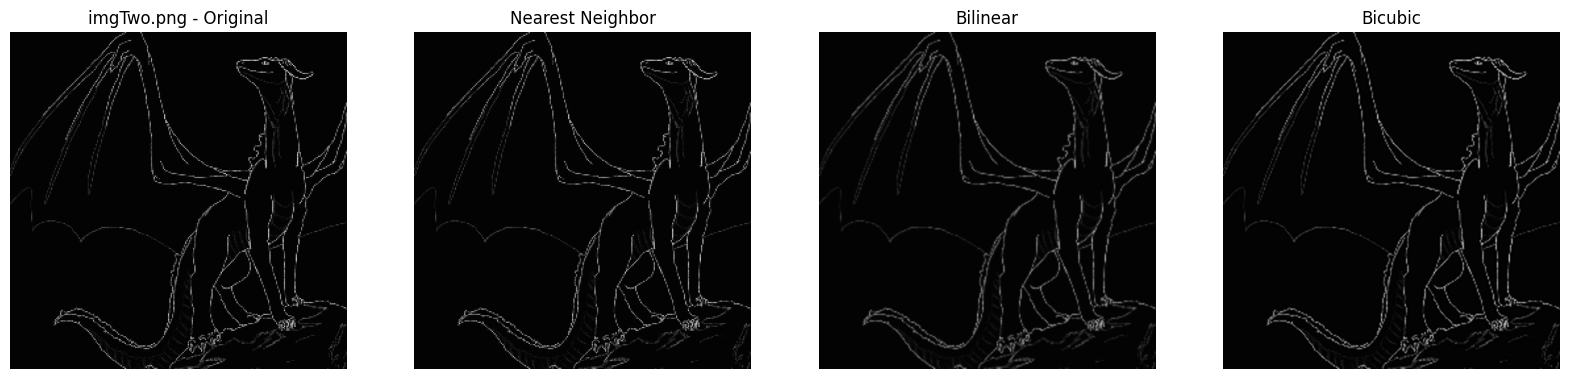

Processing file: imgOne.JPG


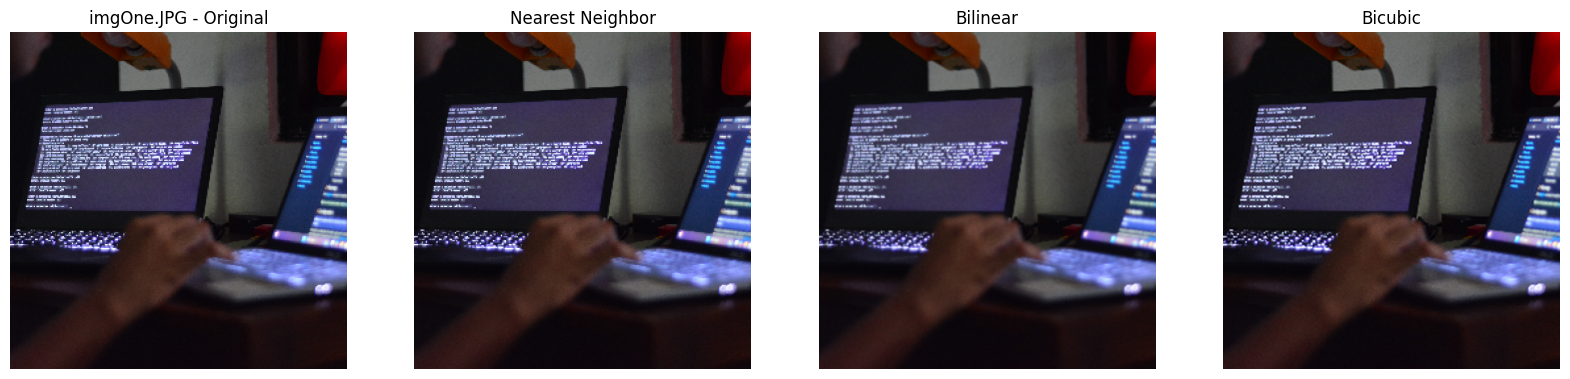

In [12]:
for filename in uploaded.keys():
    print(f"Processing file: {filename}")

    img = cv2.imread(filename)

    if img is None:
        print(f"Failed to read: {filename}")
        continue

    # Resize the image to a smaller value to make the effects much more pronounced
    # You are free to alter it as much as you want though (again, do make sure that the values are the same)
    img = cv2.resize(img, (256, 256))

    up_nn = upsample_nearest(img)
    up_bl = upsample_bilinear(img)
    up_bc = upsample_bicubic(img)

    show_multiple(
        [img, up_nn, up_bl, up_bc],
        [f'{filename} - Original', 'Nearest Neighbor', 'Bilinear', 'Bicubic']
    )

# Thank You!

LOCALLY ROOTED

GLOBALLY RESPECTED